In [76]:
import fastai.vision
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import os
import shutil
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())

In [4]:
os.getcwd()

'/micehome/nwang/repos/datastory/fastai/celebrity-classifier'

Google images search (type:face)

"jisoo blackpink"
"jennie blackpink"
"Rosé blackpink"
"lisa blackpink"

Scroll down to load more images until "Show more results" button comes up.
Paste this into console:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

Save the URLs as a csv.

# Nevermind this is trash. Use DownAlbum.

https://www.pinterest.ca/lulamulala/blackpink-jisoo/social-media/
https://www.pinterest.ca/lulamulala/blackpink-jisoo/photoshoot/



In [ ]:
folder = 'black'
file = 'urls_black.csv'

In [5]:
classes = ["jisoo", "jennie", "rose", "lisa"]

In [75]:
dest.ls()[0].ls()

PosixPath('data/jisoo/Blackpink Jisoo - Photoshoot_files')

In [94]:
for c in classes[1:2]:
    path = Path('data')
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)
    for subfolder in [subfolder for subfolder in dest.ls() if subfolder.is_dir()]:
        for img in subfolder.ls():
            shutil.copy(img.as_posix(), dest/img.name)

In [107]:
for c in classes[0:4]:
    path = Path('data')
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)
#     csv_file = [path for path in Path("csvs").ls() if c in path.as_posix()][0]
#     fastai.vision.download_images(csv_file, dest)
    fastai.vision.verify_images(dest, delete=True, max_size=500)
#     fastai.vision.verify_images(dest, delete=True, max_size=500)

tuple index out of range
tuple index out of range


In [99]:
transforms = fastai.vision.get_transforms(
    do_flip = True, #D
    flip_vert = False, #D
    max_zoom = 1.1, #D
    max_rotate = 10, #D
    max_lighting = 0.1, #default 0.2
    max_warp = 0.1, #default 0.1
    p_affine = 0.75, #D
    p_lighting = 0.75) #D

In [109]:
np.random.seed(42)

data = (fastai.vision.ImageDataBunch
        .from_folder(path,
                     train=".", valid_pct=0.2, bs=128,
                     ds_tfms=transforms, size=224)
#         .filter_by_func(lambda fname:"Blackpink" in Path(fname).as_posix())
        .normalize(fastai.vision.imagenet_stats))

In [110]:
data

ImageDataBunch;

Train: LabelList (6877 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jisoo,jisoo,jisoo,jisoo,jisoo
Path: data;

Valid: LabelList (1719 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jennie,jennie,jisoo,lisa,jennie
Path: data;

Test: None

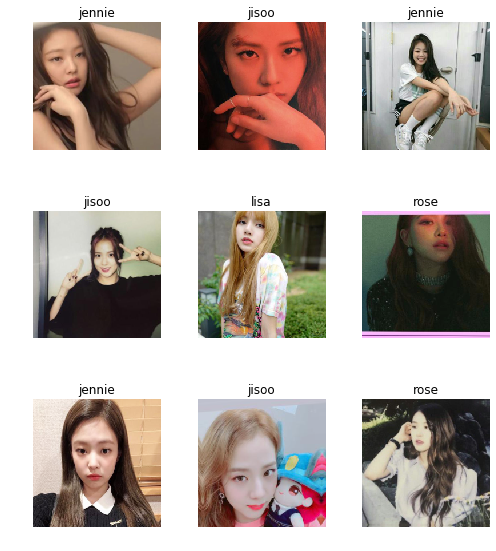

In [111]:
data.show_batch(rows=3, figsize=(7,8))

In [115]:
learn = fastai.vision.cnn_learner(data, fastai.vision.models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


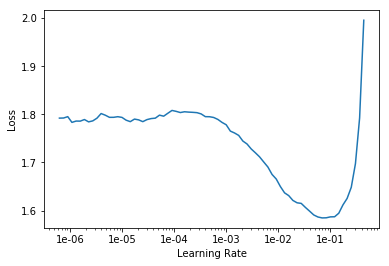

In [113]:
lr_find(learn)
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.538749,1.166170,0.507853,00:54
1,1.294221,1.028831,0.428738,00:55
2,1.130192,0.942914,0.392670,00:55
3,1.008554,0.884509,0.357766,00:55
4,0.923257,0.832667,0.341478,00:56
5,0.839915,0.799769,0.324607,00:55
6,0.779317,0.767823,0.317627,00:55
7,0.731865,0.749375,0.312973,00:55
8,0.695101,0.740748,0.308901,00:55
9,0.671506,0.737943,0.303665,00:55


In [117]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

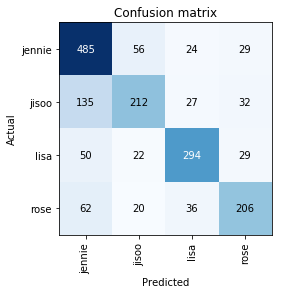

In [118]:
interp.plot_confusion_matrix()

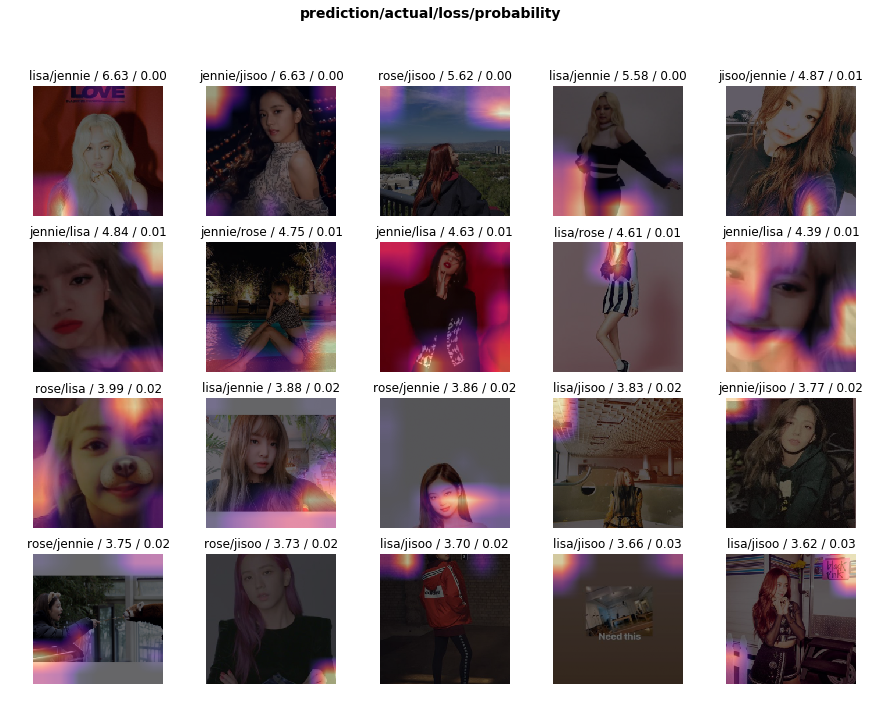

In [121]:
interp.plot_top_losses(20, figsize=(15,11))

In [120]:
interp.most_confused(min_val=2)

[('jisoo', 'jennie', 135),
 ('rose', 'jennie', 62),
 ('jennie', 'jisoo', 56),
 ('lisa', 'jennie', 50),
 ('rose', 'lisa', 36),
 ('jisoo', 'rose', 32),
 ('jennie', 'rose', 29),
 ('lisa', 'rose', 29),
 ('jisoo', 'lisa', 27),
 ('jennie', 'lisa', 24),
 ('lisa', 'jisoo', 22),
 ('rose', 'jisoo', 20)]

In [123]:
learn.save("2019-06-23_RESNET34_10epoch_0.3error")